# 超限邻域平均法滤波

In [1]:
#coding:utf-8
%matplotlib inline
import numpy as np
import scipy
from scipy.special import comb
import matplotlib.pyplot as plt
import cv2
from scipy import stats
import scipy.ndimage.filters as nd_filters
import time
from numpy.linalg import cholesky

In [2]:
gray = cv2.imread('../../datas/f4.jpg',0)
rgb = cv2.cvtColor(cv2.imread('../../datas/f4.jpg'),cv2.COLOR_BGR2RGB)
rows,cols,ch = rgb.shape

In [3]:
def noise_pepper(img,a):
    m,n = img.shape[0],img.shape[1]
    R = np.random.randn(m,n)
    dst = np.zeros(img.shape,dtype=np.float64)
    rgb = np.float64(img)
#     df_R = DataFrame(R)
    idx = R <= a
    dst[idx] = rgb[idx]
    return dst

In [4]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [5]:
src_noise_pepper = noise_pepper(gray,0.01)
noise = noise_gaussian(rows,cols,a=0,b=0.1)
src_noise_gray = gray.astype(np.float32) + noise * 255
src_noise_gray[src_noise_gray < 0] = 0
src_noise_gray[src_noise_gray > 255] = 255
src_noise_gray = src_noise_gray.astype(np.uint8)

In [6]:
def get_average_kernel(kshape):
    H = np.ones(kshape) / np.prod(kshape)
    return H

In [13]:
'''
% 函数对输人图像进行超限邻域平均法滤波
%  函数输入
%        src：输人二维图像矩阵
%        n：掩膜尺寸
%        thred：阈值
%  函数输出
%        Z：输出图像矩阵，数据类型与输人相同
'''
def threddmean_filter(src,n,thresh):
    src_f = src.astype(np.float32)
    H = get_average_kernel((n,n))
    Y = cv2.filter2D(src_f,-1,H)
    thre = np.abs(src - Y) > thresh
    dst = np.zeros_like(src_f)
    dst[thre] = Y[thre]
    print(dst)
    dst[dst < 0] = 0
    dst[dst > 255] = 255
    dst = dst.astype(np.uint8)
    return dst

In [14]:
dst = threddmean_filter(src_noise_gray,5,120)

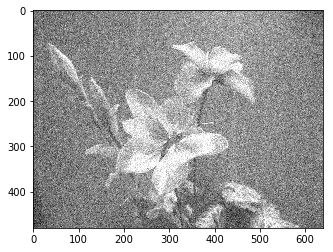

In [15]:
plt.imshow(src_noise_gray,'gray')

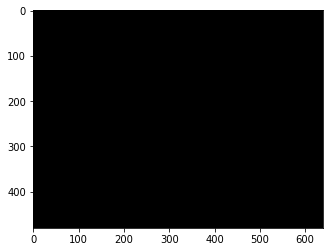

In [16]:
plt.imshow(dst,'gray')